# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [14]:
#Type your code here
# Mengimpor library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk machine learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import joblib
from sklearn.model_selection import train_test_split


# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [15]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
df_clustered = pd.read_csv("data_clustering.csv")  # jika tidak melakukan interpretasi

In [16]:
# Tampilkan 5 baris pertama dengan function head.
df_clustered.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,0
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,0
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,1
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0
4,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,0


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [17]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.# Misalkan kolom target adalah 'cluster' dan sisanya adalah fitur
X = df_clustered.drop(columns='Target')  # fitur
y = df_clustered['Target']               # target

# Memisahkan data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Menampilkan bentuk data
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test :", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test :", y_test.shape)

Ukuran X_train: (1936, 11)
Ukuran X_test : (484, 11)
Ukuran y_train: (1936,)
Ukuran y_test : (484,)


# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [18]:
# Buatlah model klasifikasi menggunakan Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data latih
dt_model.fit(X_train, y_train)

# Menggunakan model untuk memprediksi data uji
y_pred = dt_model.predict(X_test)

# Evaluasi performa model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi: 0.9958677685950413

Confusion Matrix:
 [[122   0   0   0]
 [  1 120   0   0]
 [  0   0 120   0]
 [  1   0   0 120]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       122
           1       1.00      0.99      1.00       121
           2       1.00      1.00      1.00       120
           3       1.00      0.99      1.00       121

    accuracy                           1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484



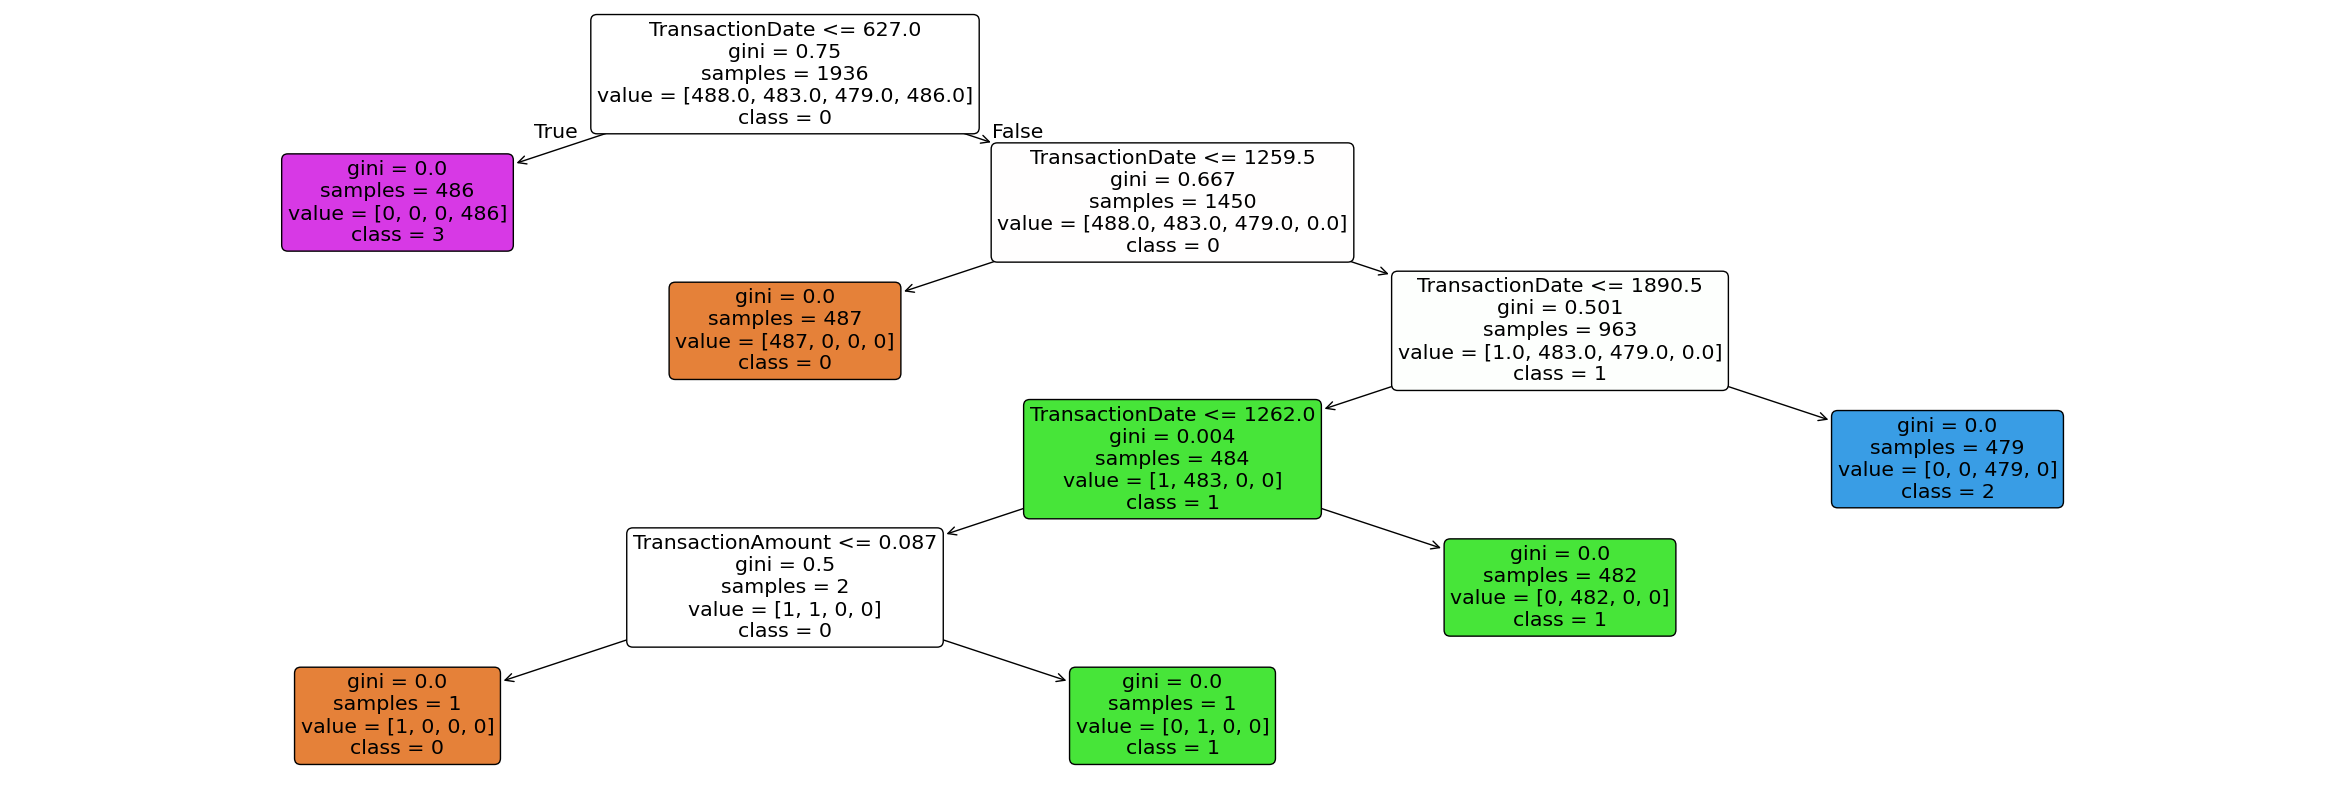

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
feature_names = X.columns.tolist()
class_names = [str(cls) for cls in sorted(y.unique())]
plot_tree(dt_model, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
plt.show()

In [20]:
# Menyimpan Model
# import joblib
# joblib.dump(model, 'decision_tree_model.h5')
# Simpan model ke file dengan nama 'decision_tree_model.h5'
joblib.dump(dt_model, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [ ]:
# Melatih model menggunakan algoritma klasifikasi selain Decision Tree.

In [ ]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.

In [ ]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
# import joblib
# joblib.dump(___, 'explore_<Nama Algoritma>_classification.h5')

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [ ]:
# Lakukan Hyperparameter Tuning dan Latih ulang.

In [ ]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.

In [ ]:
# Menyimpan Model hasil tuning
# import joblib
# joblib.dump(model_dt, 'tuning_classification.h5')